# eMOTIONAL Cities Services
This notebook shows how-to access OGC APIs (modern stack) and OWS (legacy stack) from the eMOTIONAL Cities SDI.

In [1]:
# Install OWSlib
#!pip install OWSLib
#!pip install folium

## OGC API Features
In this section we will connect to an OGC API Features endpoint, and retrieve one item collection.

Let's test the connection to the endpoint

In [2]:
from owslib.ogcapi.features import Features
landingPageURL = "https://emotional.byteroad.net/"
w = Features(landingPageURL)
print(str(w.url))

https://emotional.byteroad.net/


Let's see what conformance classes this API conforms to.

In [3]:
conformance = w.conformance()
confClasses = conformance['conformsTo']
for confClass in confClasses:
  print(confClass)

http://www.opengis.net/spec/ogcapi-records-1/1.0/conf/html
http://www.opengis.net/spec/ogcapi-records-1/1.0/conf/sorting
http://www.opengis.net/spec/ogcapi-tiles-1/1.0/conf/core
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30
http://www.opengis.net/spec/ogcapi-records-1/1.0/conf/json
http://www.opengis.net/spec/ogcapi-common-2/1.0/conf/collections
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core
http://www.opengis.net/spec/ogcapi-common-1/1.0/conf/core
http://www.opengis.net/spec/ogcapi-records-1/1.0/conf/core
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/html
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson
http://www.opengis.net/spec/ogcapi-records-1/1.0/conf/opensearch


We managed to connect to the server. Now let's list the available feature collections.

In [4]:
collections = w.collections()
feature_collections = w.feature_collections()
for feature_collection in feature_collections:
  print(feature_collection)

activity_level_ldn
cardivasular_disease_ldn
tweet_count_sample
masked
byteroad-workshop


Now let's retrieve the attributes of one of the features from the first listed feature collections to see what properties are there.

In [5]:
first_feature_collection = feature_collections[0]
collection1_query = w.collection_items(first_feature_collection)
print("The first feature in the ",first_feature_collection, " collection has the attributes ",collection1_query['features'][0]['properties'])

The first feature in the  activity_level_ldn  collection has the attributes  {'NAME': 'Kingston upon Thames', 'GSS_CODE': 'E09000021', 'HECTARES': 3726.117, 'NONLD_AREA': 0.0, 'ONS_INNER': 'F', 'SUB_2009': None, 'SUB_2006': None, 'cardio20_Value': 42.9501, 'diab20_Value': 5.3244, 'suic18_20_Value': None, 'act19_Active: sum1': 78.7}


Now how about the geometry? We can access them like any other JSON object.

In [6]:
print("The first feature in the ",first_feature_collection, " collection has the geometry ",collection1_query['features'][0]['geometry'])

The first feature in the  activity_level_ldn  collection has the geometry  {'type': 'MultiPolygon', 'coordinates': [[[[-0.330679021365537, 51.32901100492025], [-0.330594407159103, 51.329088034195514], [-0.330506076274147, 51.32914882382368], [-0.330409169913075, 51.32920859188783], [-0.330292080272198, 51.32927076991242], [-0.329913420395809, 51.32946050974752], [-0.329633553040749, 51.32965705286971], [-0.329428743255351, 51.329842076326855], [-0.329320874107605, 51.329966433569616], [-0.329214439044783, 51.33009081117072], [-0.32911628197583, 51.330263866593725], [-0.329112914170245, 51.33039600918413], [-0.329171126130402, 51.33072956432285], [-0.32919126073422, 51.33096545660248], [-0.329302868962716, 51.33152818431164], [-0.329362729951027, 51.331618963738414], [-0.329554510749604, 51.33187169215791], [-0.329578947030064, 51.332186780168556], [-0.329594169055388, 51.33228141910698], [-0.329689958501532, 51.3324896139711], [-0.329719262432561, 51.33267078224381], [-0.32971866988481

What if we want to display one of the collections? Since each collection is written out as GeoJSON, it can be loaded into a map widget like any other GeoJSON file

In [7]:
import folium
m = folium.Map(
    location=[50, 0],
    tiles="cartodbpositron",
    zoom_start=5,
)

collection_url = landingPageURL+"/collections/"+first_feature_collection+"/items?f=json&limit=1000"
print(collection_url)
folium.GeoJson(collection_url, name="geojson").add_to(m)

m

https://emotional.byteroad.net//collections/activity_level_ldn/items?f=json&limit=1000


Read the results into a geopandas geodataframe

In [8]:
#!pip install geopandas
import geopandas
df = geopandas.GeoDataFrame.from_features(collection1_query['features'])
df

geometry                  NAME  \
0  MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...  Kingston upon Thames   
1  MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51...               Croydon   
2  MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...               Bromley   
3  MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...              Hounslow   
4  MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...                Ealing   
5  MULTIPOLYGON (((0.15869 51.51219, 0.15871 51.5...              Havering   
6  MULTIPOLYGON (((-0.40407 51.61318, -0.40388 51...            Hillingdon   
7  MULTIPOLYGON (((-0.40407 51.61318, -0.40320 51...                Harrow   
8  MULTIPOLYGON (((-0.19657 51.52765, -0.19685 51...                 Brent   
9  MULTIPOLYGON (((-0.19990 51.67017, -0.19970 51...                Barnet   

    GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009 SUB_2006  \
0  E09000021   3726.117       0.000         F     None     None   
1  E09000008   8649.441       0.000         F     None     None   
2  E09000006  15013.487       0.000         F     None     None   
3  E09000018   5658.541      60.755         F     None     None   
4  E09000009   5554.428       0.000         F     None     None   
5  E09000016  11445.735     210.763         F     None     None   
6  E09000017  11570.063       0.000         F     None     None   
7  E09000015   5046.330       0.000         F     None     None   
8  E09000005   4323.270       0.000         F     None     None   
9  E09000003   8674.837       0.000         F     None     None   

   cardio20_Value  diab20_Value suic18_20_Value  act19_Active: sum1  
0         42.9501        5.3244            None                78.7  
1         74.9819        7.2872            None                68.7  
2         54.6389        6.0347            None                80.1  
3         71.8319        8.7115            None                68.1  
4         68.2386        9.0342            None                71.5  
5         65.9483        7.4664            None                65.5  
6         73.8004        8.0955            None                66.2  
7         45.4440       10.1491            None                67.9  
8         81.0555        8.6811            None                68.1  
9         57.3993        6.6217            None                72.4

## OGC API Records
In this section we will access and query an OGC API records catalogue

In [9]:
from owslib.ogcapi.records import Records
w = Records('https://emotional.byteroad.net/')

List the catalogues available at that endpoint

In [10]:
records = w.records()

In [11]:
records

['ec_catalog', 'masked_rec']

Let's choose one catalogue, by name

In [12]:
my_catalogue = w.collection('ec_catalog')

In [13]:
len(my_catalogue)

7

Show catalog title

In [14]:
my_catalogue['title']

'eMOTIONAL Cities Metadata catalog'

Show catalog description

In [15]:
my_catalogue['description']

'eMOTIONAL Cities Metadata catalog (OGC API Records)'

What are the catalog queryables?

In [16]:
my_catalogue_queryables = w.collection_queryables('ec_catalog')
my_catalogue_queryables

{'type': 'object',
 'title': 'eMOTIONAL Cities Metadata catalog',
 'properties': {'geometry': {'$ref': 'https://geojson.org/schema/Geometry.json'},
  'created': {'title': 'created', 'type': 'string'},
  'description': {'title': 'description', 'type': 'string'},
  'formats': {'title': 'formats', 'type': 'string'},
  'id': {'title': 'id', 'type': 'string'},
  'keywords': {'title': 'keywords', 'type': 'string'},
  'language': {'title': 'language', 'type': 'string'},
  'license': {'title': 'license', 'type': 'string'},
  'nameascii': {'title': 'nameascii', 'type': 'string'},
  'publisher': {'title': 'publisher', 'type': 'string'},
  'title': {'title': 'title', 'type': 'string'},
  'type': {'title': 'type', 'type': 'string'},
  'updated': {'title': 'updated', 'type': 'string'}},
 '$schema': 'http://json-schema.org/draft/2019-09/schema',
 '$id': 'https://emotional.byteroad.net/collections/ec_catalog/queryables'}

Let's get the collection of records

In [17]:
my_catalogue_query = w.collection_items('ec_catalog')
my_catalogue_query

{'type': 'FeatureCollection',
 'features': [{'id': '9b32e1572c4f4c69861d0e50cf6782',
   'type': 'Feature',
   'recordUpdated': '2022-03-31T09:59:58.131Z',
   '@version': '1',
   'recordCreated': '2022-03-31T09:59:58.131Z',
   'properties': {'id': '9b32e1572c4f4c69861d0e50cf6782',
    'created': '2022-03-31T09:59:58.131Z',
    'updated': '2022-03-31T09:59:58.131Z',
    'title': 'Physical activity levels in London Boroughs in 2019',
    'description': 'Physical activity levels in London Boroughs in 2019 was extracted from the Active Lives Survey Nov 19/20. The number refers to the ratio of active people (at least 30mins per week).',
    'language': 'en',
    'type': 'Feature',
    'license': 'Attribution-NonCommercial-NoDerivatives 4.0 International',
    'contactPoint': {'name': 'Haifeng Niu',
     'institution': 'University of Cambridge',
     'email': 'hn303(at)cam.ac.uk'},
    'publisher': 'University of Cambridge',
    'formats': ['HTML', 'GeoJSON'],
    'keywords': ['Mesurements', 

Access the first record

In [18]:
my_catalogue_query['features'][0]['properties'].keys()

dict_keys(['id', 'created', 'updated', 'title', 'description', 'language', 'type', 'license', 'contactPoint', 'publisher', 'formats', 'keywords', 'themes', 'extent', 'associations'])

Access one key (description) of the first record

In [98]:
my_catalogue_query['features'][0]['properties']['description']

'Physical activity levels in London Boroughs in 2019 was extracted from the Active Lives Survey Nov 19/20. The number refers to the ratio of active people (at least 30mins per week).'

You can use CQL to query the catalog. Let's start with a free text query (using the 'q' parameter)

In [19]:
my_catalogue_query2 = w.collection_items('ec_catalog', q='tweets')
my_catalogue_query2['numberMatched']

1

You can also apply a filter to a field

In [20]:
my_catalogue_cql_text_query = w.collection_items('ec_catalog', filter="title LIKE 'Mortality%'")
total = my_catalogue_cql_text_query['numberMatched']

List the query results

In [21]:
for i in range(total):
    print(my_catalogue_cql_text_query['features'][i]['properties']['title'])

Physical activity levels in London Boroughs in 2019
Mortality rate from all cardiovascular diseases in London Boroughs 2020
Number of tweets in hexagon cells of London (August 2021)


## WMS
In this section we will use the legacy WMS service, to get raster imagery.

Connect to the WMS endpoint

In [22]:
from owslib.wms import WebMapService
wms_url = "https://emotional.byteroad.net/geoserver/ows?service=wms&version=1.3.0&request=GetCapabilities"
wms = WebMapService(wms_url, version="1.3.0")

Access information about the service

In [23]:
print(f"WMS version: {wms.identification.version}")
print(f"WMS title: {wms.identification.title}")
print(f"WMS abstract: {wms.identification.abstract}")
print(f"Provider name: {wms.provider.name}")
print(f"Provider address: {wms.provider.contact.address}")

WMS version: 1.3.0
WMS title: GeoServer Web Map Service
WMS abstract: A compliant implementation of WMS plus most of the SLD extension (dynamic styling). Can also generate PDF, SVG, KML, GeoRSS
Provider name: None
Provider address: None


List available layers

In [24]:
list(wms.contents)

['ec:Observations',
 'ec:active_score_ldn',
 'ec:cardivasular_disease_ldn',
 'ec:tweet_count_sample']

View some properties of the layer: boundingBox, boundingBoxWGS84, crsOptions and styles. These are needed, if you want to do a request.

In [25]:
wms.contents['ec:tweet_count_sample'].boundingBox

(-0.5150046471507211,
 51.27878316405779,
 0.3413663440285226,
 51.697489664149785,
 'CRS:84')

In [26]:
wms.contents['ec:tweet_count_sample'].boundingBoxWGS84

(-0.5150046471507211,
 51.27878316405779,
 0.3413663440285226,
 51.697489664149785)

In [27]:
print(wms['ec:tweet_count_sample'].crsOptions)

['EPSG:2260', 'EPSG:32347', 'EPSG:32702', 'EPSG:6321', 'EPSG:62056405', 'EPSG:4025', 'EPSG:3912', 'EPSG:8021', 'EPSG:26992', 'EPSG:2445', 'EPSG:8248', 'EPSG:32339', 'EPSG:62636405', 'EPSG:27212', 'EPSG:2471', 'EPSG:5181', 'EPSG:32635', 'EPSG:21422', 'EPSG:7322', 'EPSG:8066', 'EPSG:63266405', 'EPSG:3644', 'EPSG:3343', 'EPSG:4917', 'EPSG:5129', 'EPSG:22183', 'EPSG:2579', 'EPSG:4318', 'EPSG:2676', 'EPSG:32086', 'EPSG:2796', 'EPSG:20251', 'EPSG:3601', 'EPSG:4512', 'EPSG:2491', 'EPSG:6165', 'EPSG:2340', 'EPSG:8207', 'EPSG:6274', 'EPSG:3325', 'EPSG:8045', 'EPSG:3251', 'EPSG:5069', 'EPSG:4612', 'EPSG:32752', 'EPSG:4682', 'EPSG:31251', 'EPSG:32237', 'EPSG:3412', 'EPSG:7912', 'EPSG:3013', 'EPSG:8316', 'EPSG:2173', 'EPSG:7007', 'EPSG:6603', 'EPSG:29185', 'EPSG:31463', 'EPSG:5546', 'EPSG:4440', 'EPSG:4479', 'EPSG:2121', 'EPSG:2355', 'EPSG:32031', 'EPSG:4525', 'EPSG:26742', 'EPSG:32647', 'EPSG:2241', 'EPSG:31286', 'EPSG:30165', 'EPSG:2948', 'EPSG:63266409', 'EPSG:2220', 'EPSG:32030', 'EPSG:6252', 

In [28]:
print(wms['ec:tweet_count_sample'].styles)

{'polygon': {'title': 'Grey Polygon', 'legend': 'https://emotional.byteroad.net/geoserver/ows?service=WMS&request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=ec%3Atweet_count_sample', 'legend_width': '20', 'legend_height': '20', 'legend_format': 'image/png'}}


List which operations are available in the server.

In [29]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [30]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get',
  'url': 'https://emotional.byteroad.net/geoserver/ows?SERVICE=WMS&'}]

In [31]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/pdf',
 'application/rss+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtype=openlayers3']

We have everything we need to make a GetMap request

In [32]:
img = wms.getmap(
    layers=['ec:tweet_count_sample'],
    size=[600, 400],
    srs="EPSG:4326",
    bbox=[-0.5150046471507211,
 51.27878316405779,
 0.3413663440285226,
 51.697489664149785],
    format="image/jpeg")

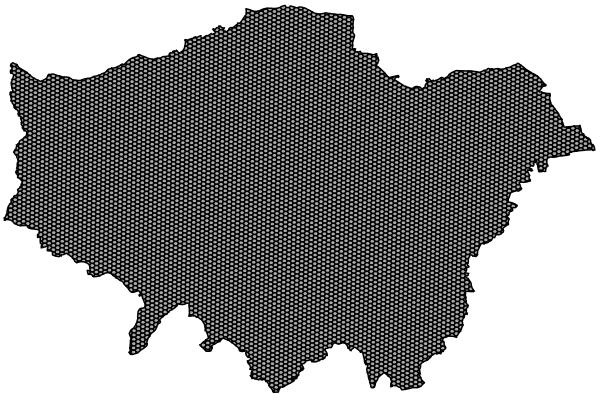

In [33]:
from IPython.display import Image
Image(img.read())

Export image

In [34]:
out = open('tweets.jpg', 'wb')
out.write(img.read())
out.close()

Read layer in folium

In [35]:
folium.raster_layers.WmsTileLayer(
    url='https://emotional.byteroad.net/geoserver/ows?',
    layers='ec:tweet_count_sample',
    name='tweet_count_sample',
    fmt='image/png',
    overlay=False,
    control=True,
).add_to(m)

In [36]:
m